In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%load_ext nb_black

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Log Normalization

## Dùng cho field có Var cao và không gian dương (pp lệch phải và tất cả values đều > 0)

In [2]:
df = pd.read_csv('data/wine_types.csv')
df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df_new = df[['Alcohol', 'Ash', 'Proline']]
df_new.head()

,Alcohol,Ash,Proline
0,14.23,2.43,1065
1,13.20,2.14,1050
2,13.16,2.67,1185
3,14.37,2.50,1480
4,13.24,2.87,735


In [4]:
# kiểm tra phương sai
print('Alcohol Variance:', df_new['Alcohol'].var())
print('Ash Variance:', df_new['Ash'].var())
print('Proline Variance:', df_new['Proline'].var())

Alcohol Variance: 0.6590623278105759
Ash Variance: 0.07526463530756046
Proline Variance: 99166.71735542436


In [5]:
'''
nhìn vào phương sai của 3 cái đều > 0 => đều là phân phối lệch phải
ô kìa, var của Proline lớn quá điiii
=> cần phải log normalization cho Proline

Alcohol và Ash có var nhỏ nên ko cần
'''

'\nô kìa, var của Proline lớn quá điiii\n'

In [11]:
# ktra xem trong Proline có giá trị âm hay ko
df_new['Proline'].min(), df_new['Proline'].max()

(278, 1680)

In [8]:
"""
vì các values của Proline đều > 0 => dùng log
"""

'\nvì các values của Proline đều > 0 => dùng log\n'

<IPython.core.display.Javascript object>

In [10]:
# chuẩn hóa log nè
df_new["Proline_log"] = np.log(df_new["Proline"])

<IPython.core.display.Javascript object>

In [11]:
df_new.head()

,Alcohol,Ash,Proline,Proline_log
0,14.23,2.43,1065,6.970730
1,13.20,2.14,1050,6.956545
2,13.16,2.67,1185,7.077498
3,14.37,2.50,1480,7.299797
4,13.24,2.87,735,6.599870


<IPython.core.display.Javascript object>

In [12]:
print("Proline Variance:", df_new["Proline"].var())
print("Proline_log Variance:", df_new["Proline_log"].var())

Proline Variance: 99166.71735542436
Proline_log Variance: 0.17231366191842012


<IPython.core.display.Javascript object>

In [14]:
"""
ô kìa, phương sai nhỏ hơn nhiều r nè
"""

'\nô kìa, phương sai nhỏ hơn nhiều r nè\n'

<IPython.core.display.Javascript object>

In [13]:
df_new["Proline"].skew()

0.7678217813897322

<IPython.core.display.Javascript object>

In [17]:
df_new['Proline_log'].skew()


0.08682281513423201

In [15]:
"""
skew cũng nhỏ hơn nhiều nè:)
"""

'\nskew cũng nhỏ hơn nhiều nè:)\n'

<IPython.core.display.Javascript object>

### Proline ban đầu

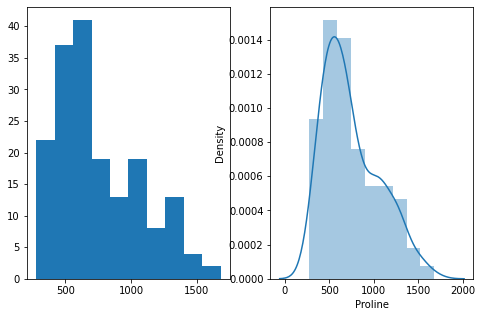

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.hist(df_new["Proline"])
plt.subplot(122)
sns.distplot(df_new["Proline"])
plt.show()

### Proline sau khi chuẩn hóa log

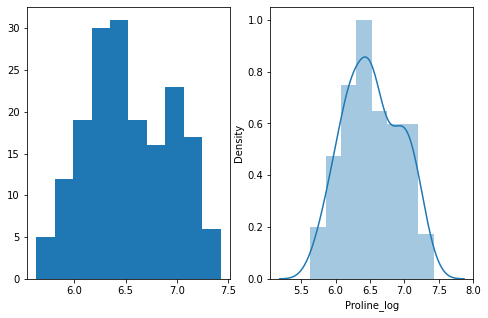

<IPython.core.display.Javascript object>

In [17]:
plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.hist(df_new['Proline_log'])
plt.subplot(122)
sns.distplot(df_new['Proline_log'])
plt.show()

In [18]:
"""
=> độ lệch phải giảm đi nhiều á ^^
"""

'\n=> độ lệch phải giảm đi nhiều á ^^\n'

<IPython.core.display.Javascript object>

## mammals

In [20]:
df2 = pd.read_csv("data/mammals.csv", index_col=0)
df2.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
1,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
2,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
3,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
4,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
5,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


<IPython.core.display.Javascript object>

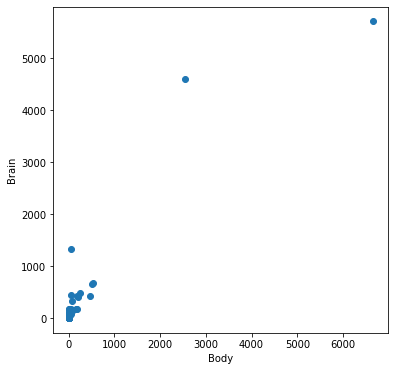

<IPython.core.display.Javascript object>

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(df2["BodyWt"], df2["BrainWt"])
plt.xlabel("Body")
plt.ylabel("Brain")
plt.show()

In [24]:
"""
Nhìn biểu đồ => khó để nhận xét
"""

'\nNhìn biểu đồ => khó để nhận xét\n'

<IPython.core.display.Javascript object>

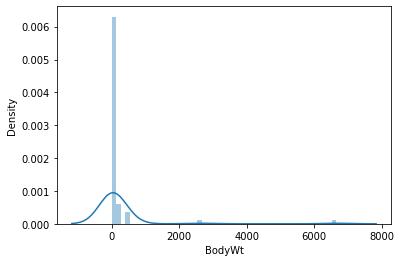

<IPython.core.display.Javascript object>

In [23]:
sns.distplot(df2["BodyWt"])
plt.show()

In [25]:
"""
Nhìn đồ thị: phân phối lệch phải
"""

'\nNhìn đồ thị: phân phối lệch phải\n'

<IPython.core.display.Javascript object>

In [26]:
df2['BodyWt'].skew()

6.563608062833757

In [26]:
# skew > 0 => pp lệch phải

<IPython.core.display.Javascript object>

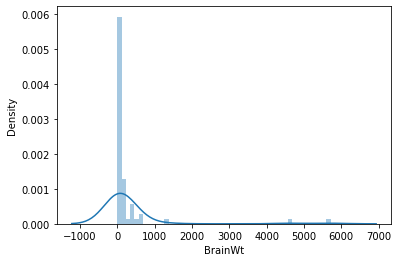

<IPython.core.display.Javascript object>

In [27]:
sns.distplot(df2["BrainWt"])
plt.show()

In [28]:
df2["BrainWt"].skew()

5.071589456939673

<IPython.core.display.Javascript object>

In [29]:
# skew > 0 => pp lệch phải

<IPython.core.display.Javascript object>

In [30]:
df2["BodyWt"].min(), df2["BrainWt"].min()

(0.005, 0.14)

<IPython.core.display.Javascript object>

In [32]:
# ko có giá trị âm => có thể dùng log nomilization

<IPython.core.display.Javascript object>

In [33]:
df2["BodyWt"].var(), df2["BrainWt"].var()

(808485.1278776556, 865418.9104017982)

<IPython.core.display.Javascript object>

In [34]:
# ko có giá trị âm => có thể dùng log nomilization

<IPython.core.display.Javascript object>

In [35]:
df2["BodyWt_log"] = np.log(df2["BodyWt"])
df2["BrainWt_log"] = np.log(df2["BrainWt"])

<IPython.core.display.Javascript object>

In [36]:
df2["BodyWt_log"].var(), df2["BrainWt_log"].var()

(9.75392640180111, 5.985420866215201)

<IPython.core.display.Javascript object>

In [39]:
"""
Phương sai giảm nè
"""

'\nPhương sai giảm nè\n'

<IPython.core.display.Javascript object>

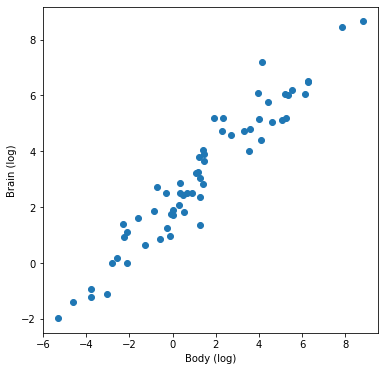

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(6, 6))
plt.scatter(df2["BodyWt_log"], df2["BrainWt_log"])
plt.xlabel("Body (log)")
plt.ylabel("Brain (log)")
plt.show()

In [38]:
df2[["BodyWt_log", "BrainWt_log"]].corr()

,BodyWt_log,BrainWt_log
BodyWt_log,1.000000,0.959575
BrainWt_log,0.959575,1.000000


<IPython.core.display.Javascript object>

In [41]:
"""

=> body (log) và brain (log) có tương quan tuyến tính thuận (mạnh)
"""

'\n\n=> body (log) và brain (log) có tương quan tuyến tính thuận (mạnh)\n'

<IPython.core.display.Javascript object>